In [1]:
import xalglib
import scipy.linalg as scl
import scipy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
A = [[1/2,0,0],[0,3/2,0],[0,0,5/2]]

print(A)

a, tau, d, e = xalglib.smatrixtd(A,3,True)

print(d,e)

s,v=scl.eigh_tridiagonal(d,e)

print(s)

[[0.5, 0, 0], [0, 1.5, 0], [0, 0, 2.5]]
[0.5, 1.5, 2.5] [0.0, 0.0]
[0.5 1.5 2.5]


In [3]:
#Defining and filling matrix Q^4
def q(n):
    A = np.zeros([n,n])
    for i in range(n):
        A[i][i]=6*i**2+6*i+3 #Diagonal elemnts
        if i+4<n:
            A[i][i+4]=np.sqrt((i+1)*(i+2)*(i+3)*(i+4)) #fourth upper off-diagonal elements
        if i+2<n: 
            A[i][i+2]=(4*i+6)*np.sqrt((i+1)*(i+2)) #second upper off-diagonal elements
        if i-2<n:
            A[i][i-2]=(4*i-2)*np.sqrt(i*(i-1)) #second bottom off-diagonal elemnts
        if i-4<n:
            A[i][i-4]=np.sqrt(i*(i-1)*(i-2)*(i-3)) #fourth bottom off-diagonal elements
    return A

#Defining unpertubed Hamiltonian
def h(n):
    A=np.zeros([n,n])
    for i in range(n):
        A[i][i]=(i+1/2)
    return A

In [4]:
#Defining function to calculate eigenvalues
def f(n,lamb):
    #Calculating pertubed Hamiltonian
    H = h(n)+lamb*q(n)
    #Finding the tridiagonal form of the Hamilton matrix
    a, tau, d, e = xalglib.smatrixtd(H.tolist(),n,True)
    #Finding die eigenvalues by the off-diagonal elements
    s,v=scl.eigh_tridiagonal(d,e)
    #print(H)
    print("Eigenvalues:")
    for i in range(10):
        print("n =",i,": E_n =", np.round(s[i],3))
    return s

In [10]:
n = 15 #Number of Eigenvalues
lamb = 0.1 #Pertubation coefficient

s = f(n,lamb) #computing the algorithm

Eigenvalues:
n = 0 : E_n = 0.669
n = 1 : E_n = 2.217
n = 2 : E_n = 4.104
n = 3 : E_n = 6.218
n = 4 : E_n = 8.521
n = 5 : E_n = 11.302
n = 6 : E_n = 14.582
n = 7 : E_n = 21.075
n = 8 : E_n = 27.266
n = 9 : E_n = 42.837


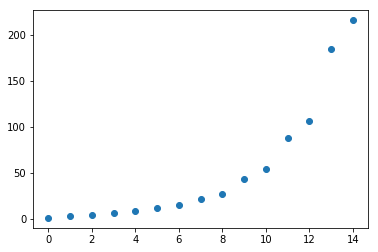

In [6]:
#Plot the results for the eigenvalues against its number n
plt.plot(np.arange(0,15),s[:15],"o")